In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2                        #Библиотека компьютерного зрения OpenCV

** Изображение из https://doi.org/10.1016/j.bbamem.2021.183779 **

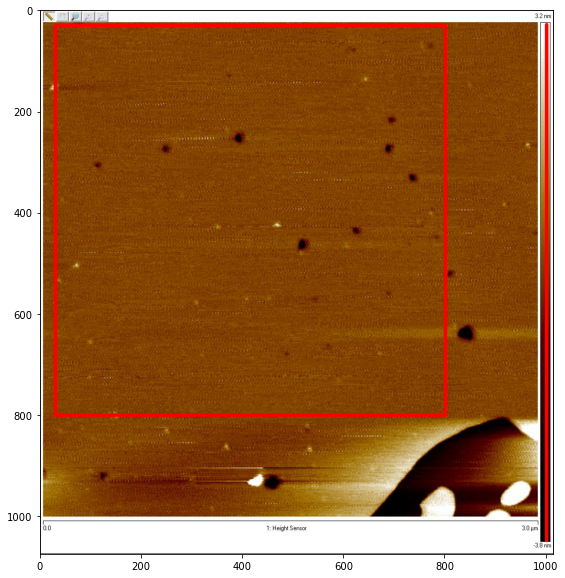

In [52]:
#Загружаем изображение

img = cv2.imread('images/PGPGCL_H2O_004.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Обрезаем изображение

cv2.rectangle(img,(30,30),(800,800),(255,0,0),5);       #Красный квадрат 
cv2.rectangle(img,(1000,28),(1000,1048),(255,0,0),5);   #Красная линия
plt.figure(figsize=(10,10))
plt.imshow(img)


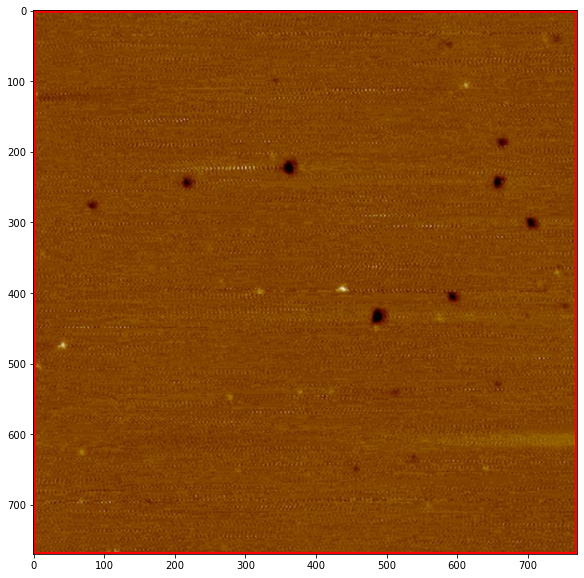

In [53]:
#Переименуем красный квадрат и красную линию

bilayerImg = img[30:800,30:800]      #Красный квадрат (двухслойный/bilayer)
scaleImg = img[28:1048,1000]         #Красная линия (шкала высот)
plt.figure(figsize=(10,10))
plt.imshow(bilayerImg)

In [54]:
bilayerImg.shape #Получить параметры красного квадрата в пикселях

(770, 770, 3)

In [55]:
#Средний цвет RGB красного квадрата

promRGB = np.mean(bilayerImg, axis=(0,1))
promRGB = [int(i) for i in promRGB]
promRGB

[132, 66, 2]

In [56]:
#Проверьте значения красной линии для i в scaleImg:
for i in scaleImg:
    print(i)

[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255  

[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255   0   0]
[255  

In [57]:
#Сравните цвет RGB каждого пикселя в красном квадрате с цветом RGB каждого пикселя в красной линии.

c = 0
for i in scaleImg:
    c += 1
    if np.sum(abs(i - np.array(promRGB))) < 7:
        print('Match',c)                        #Сопоставьте с более похожим цветом по шкале высоты

467 индекс средней высоты

In [58]:
#Средняя высота бислоя

Bilayer_h = 3.2 + 3.8  #Высота микрофотографии АСМ
Match = 467            #Индекс средней высоты
Scale_pixls = 1020     #Количество пикселей в красной линии 
Top_h = 3.2            #Самая высокая точка на микрофотографии АСМ

h = (Match*Bilayer_h)/Scale_pixls
Real_h = Top_h-h
print(Real_h)


-0.004901960784313708


В среднем липидный бислой был однородным.

Изображение из https://doi.org/10.1016/j.bbamem.2021.183779

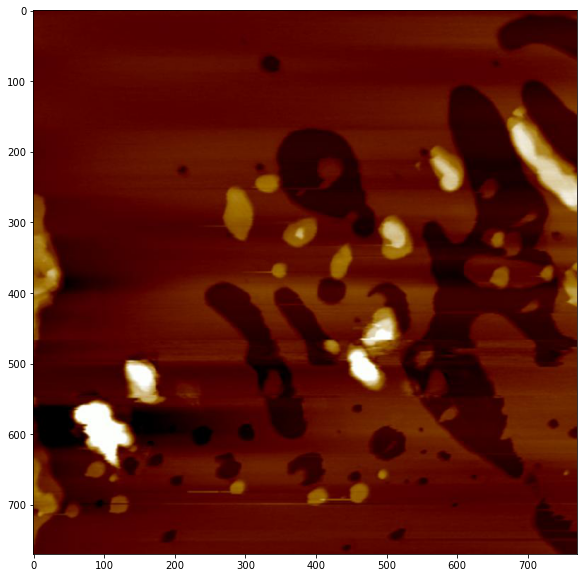

In [59]:
#Загружаем изображение

img2 = cv2.imread('images/PGPGCL_H2O_AMP_007_KR.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

#Обрезаем изображение

bilayerImg = img2[30:800,30:800]
scaleImg = img2[28:1048,1000]
plt.figure(figsize=(10,10))
plt.imshow(bilayerImg)

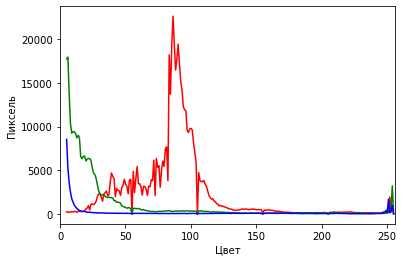

In [60]:
# Создайте график гистограммы с тремя линиями, по одной для каждого цвета.

colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        bilayerImg[:, :, channel_id], bins=256, range=(5, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Цвет")
plt.ylabel("Пиксель")

plt.show()

In [61]:
#Средний цвет RGB бислоя после 30 минут взаимодействия с КР-12 AMP

promRGB = np.mean(bilayerImg, axis=(0,1))
promRGB = [int(i) for i in promRGB]
promRGB

[86, 16, 5]

In [62]:
#Сравните цвет RGB каждого пикселя в двухслойном изображении с цветом RGB каждого пикселя на шкале высоты.

c = 0
meann = []
for i in scaleImg:
    c += 1
    if np.sum(abs(i - np.array(promRGB))) < 22:
      print('Match',c)                            #Сопоставьте с более похожим цветом на шкале высот
      meann.append(c)

Match 581
Match 582
Match 583
Match 584
Match 585
Match 586
Match 587
Match 588
Match 589
Match 590
Match 591
Match 592
Match 593
Match 594
Match 595
Match 596
Match 632
Match 633
Match 634
Match 635


In [63]:
np.mean(meann) #Индекс средней высоты

597.5

In [64]:
#Средняя высота бислоя через 30 мин взаимодействия с пептидом

Bilayer_h = 14.6 + 9.7  #Высота микрофотографии АСМ
Match = 597             #Индекс средней высоты
Scale_pixls = 1020      #Количество пикселей в красной линии 
Top_h = 14.6            #Самая высокая точка на микрофотографии АСМ

h = (Match*Bilayer_h)/Scale_pixls
Real_h = Top_h-h
print(Real_h)



0.377352941176472


In [65]:
#Процесс сегментации

pixel_values = bilayerImg.reshape((-1, 3)) #Изменить изображение

pixel_values = np.float32(pixel_values)    #Конвертируем в float
#pixel_values.shape
#pixel_values

#Критерий сегментации
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)  

k = 4
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

#Преобразование обратно в 8-битные значения
centers = np.uint8(centers) 

#Сгладить массив меток
labels = labels.flatten() 

centers #Средний цвет RGB каждого кластера

array([[ 91,  10,   0],
       [144,  89,  11],
       [ 46,   0,   0],
       [231, 221, 192]], dtype=uint8)

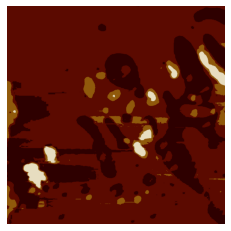

In [66]:
#labels 
#labels.shape

segmented_image = centers[labels.flatten()]
#segmented_image 

#Изменить форму до исходного размера изображения
segmented_image = segmented_image.reshape(bilayerImg.shape)

#Выводим изображение
fig = plt.figure()
plt.imshow(segmented_image)
plt.axis('off')
fig.savefig('supp_Fig_1aa.png',dpi =1200)



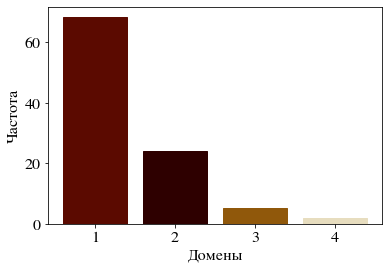

In [77]:
#Частотный график для каждого кластера

pd.Series(labels).value_counts()/labels.shape[0]*100

propor = pd.Series(labels).value_counts()/labels.shape[0]*100

plt.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure()
bar = plt.bar(['1','2','3','4'],propor.values)
bar[0].set_color((91/255,10/255,0))
bar[1].set_color((46/255,0,0))
bar[2].set_color((144/255,88/255,11/255))
bar[3].set_color((231/255,221/255,191/255))
plt.ylabel('Частота')
plt.xlabel('Домены')
fig.savefig('supp_Fig_1b.png',dpi =1200)

In [68]:
centers #Средний цвет RGB каждого кластера

array([[ 91,  10,   0],
       [144,  89,  11],
       [ 46,   0,   0],
       [231, 221, 192]], dtype=uint8)

In [69]:
#Самый яркий домен

c = 0
meann = []
for i in scaleImg:
    c += 1
    if np.sum(abs(i - np.array(centers[0]))) < 9:
      print('Match',c)
      meann.append(c)

Match 589
Match 590
Match 591
Match 592


In [70]:
#Средняя высота самого яркого домена

Bilayer_h = 14.6 + 9.7  #Высота микрофотографии АСМ
Match = 102             #Индекс средней высоты
Scale_pixls = 1020      #Количество пикселей в красной линии
Top_h = 14.6            #Самая высокая точка на микрофотографии АСМ

h = (Match*Bilayer_h)/Scale_pixls
Real_h = Top_h-h
print(Real_h)

12.17


In [71]:
#Яркий домен

c = 0
meann = []
for i in scaleImg:
    c += 1
    if np.sum(abs(i - np.array(centers[1]))) < 35:
      print('Match',c)
      meann.append(c)

Match 370
Match 371
Match 372
Match 373
Match 374
Match 379
Match 380
Match 401


In [72]:
#Средняя высота яркого домена

Bilayer_h = 14.6 + 9.7  #Высота микрофотографии АСМ
Match = 371             #Индекс средней высоты
Scale_pixls = 1020      #Количество пикселей в красной линии
Top_h = 14.6            #Самая высокая точка на микрофотографии АСМ

h = (Match*Bilayer_h)/Scale_pixls
Real_h = Top_h-h
print(Real_h)

5.761470588235294


In [73]:
#Темный домен

c = 0
meann = []
for i in scaleImg:
    c += 1
    if np.sum(abs(i - np.array(centers[2]))) < 7:
      print('Match',c)
      meann.append(c)

Match 765
Match 766
Match 767
Match 768
Match 769
Match 770
Match 771
Match 772


In [74]:
#Средняя высота темного домена

Bilayer_h = 14.6 + 9.7  #Высота микрофотографии АСМ
Match = 770             #Индекс средней высоты
Scale_pixls = 1020      #Количество пикселей в красной линии
Top_h = 14.6            #Самая высокая точка на микрофотографии АСМ

h = (Match*Bilayer_h)/Scale_pixls
Real_h = Top_h-h
print(Real_h)

-3.74411764705882


In [75]:
#Фоновый домен

c = 0
meann = []
for i in scaleImg:
    c += 1
    if np.sum(abs(i - np.array(centers[3]))) < 7:
      print('Match',c)
      meann.append(c)

Match 104
Match 105
Match 106
Match 107
Match 108


In [76]:
#Средняя высота фонового домена

Bilayer_h = 14.6 + 9.7  #Высота микрофотографии АСМ
Match = 591             #Индекс средней высоты
Scale_pixls = 1020      #Количество пикселей в красной линии
Top_h = 14.6            #Самая высокая точка на микрофотографии АСМ

h = (Match*Bilayer_h)/Scale_pixls
Real_h = Top_h-h
print(Real_h)

0.5202941176470617
